In [1]:
import tensorflow as tf
import keras
import pickle
import numpy as np
import pandas
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

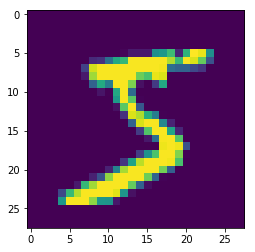

In [3]:
plt.imshow(x_train[0])
plt.show()

In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train,y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 58us/step - loss: 0.2331 - accuracy: 0.9313
Epoch 2/3
60000/60000 [==============================] - 3s 56us/step - loss: 0.0981 - accuracy: 0.9705
Epoch 3/3
60000/60000 [==============================] - 3s 56us/step - loss: 0.0668 - accuracy: 0.9787


In [8]:
model.save('model.h5')
model = keras.models.load_model('model.h5')

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

10000/10000 [==============================] - 0s 23us/step

Test accuracy: 0.9697999954223633

Test loss: 0.09695650805109181


In [10]:
predictions=model.predict(x_test)
predictions

array([[1.4912814e-08, 2.8398460e-07, 2.1443695e-06, ..., 9.9999309e-01,
        1.2266800e-07, 2.3665057e-06],
       [5.3496701e-06, 2.4373207e-04, 9.9970418e-01, ..., 3.7059294e-08,
        2.3521785e-07, 2.1976912e-10],
       [2.9711350e-07, 9.9991643e-01, 1.2770987e-06, ..., 4.5699242e-05,
        7.4702562e-06, 3.4062217e-07],
       ...,
       [1.6726695e-11, 1.5043234e-08, 1.1108231e-12, ..., 2.1399371e-06,
        4.4179265e-09, 6.4653329e-07],
       [3.9095752e-10, 5.8460303e-14, 1.2708987e-13, ..., 2.4269004e-13,
        1.3363436e-09, 3.1729892e-12],
       [2.7107756e-08, 8.2163311e-11, 6.8169946e-08, ..., 2.9006532e-12,
        6.6902919e-09, 1.9627469e-09]], dtype=float32)

In [11]:
len(x_test)

10000

Predicted: 7 Actual: 7


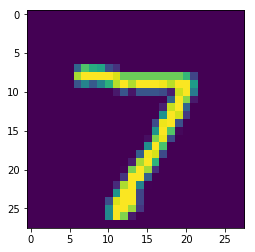

Predicted: 2 Actual: 2


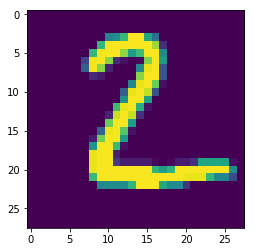

Predicted: 1 Actual: 1


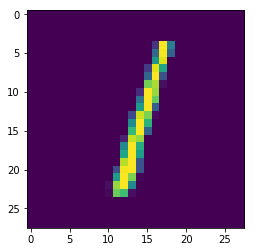

Predicted: 0 Actual: 0


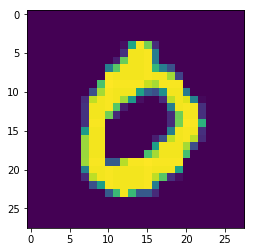

Predicted: 4 Actual: 4


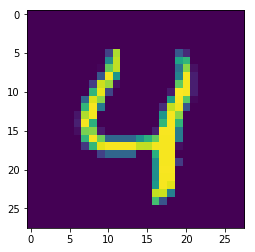

Predicted: 1 Actual: 1


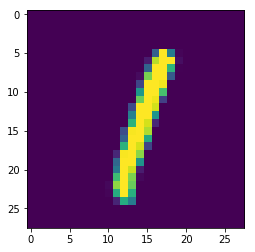

Predicted: 4 Actual: 4


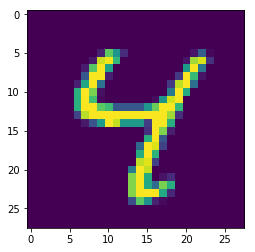

Predicted: 9 Actual: 9


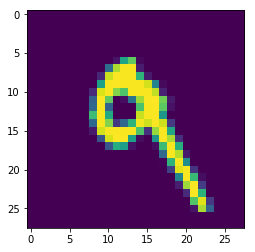

Predicted: 5 Actual: 5


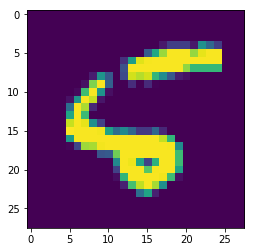

Predicted: 9 Actual: 9


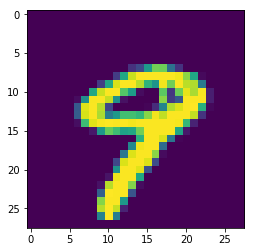

Predicted: 0 Actual: 0


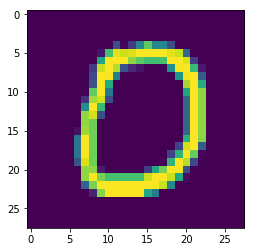

Predicted: 6 Actual: 6


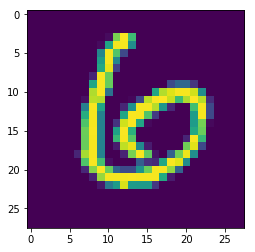

Predicted: 9 Actual: 9


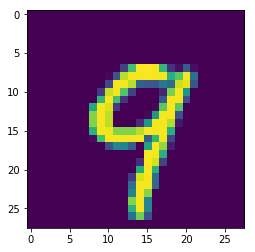

Predicted: 0 Actual: 0


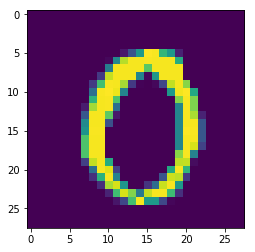

Predicted: 1 Actual: 1


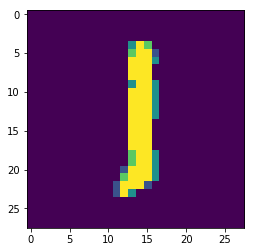

Predicted: 5 Actual: 5


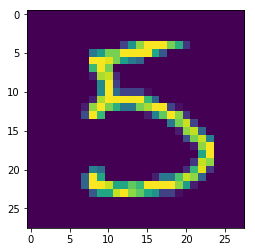

Predicted: 9 Actual: 9


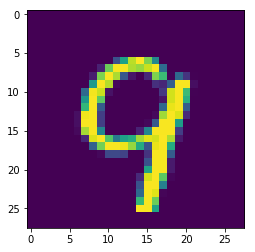

Predicted: 7 Actual: 7


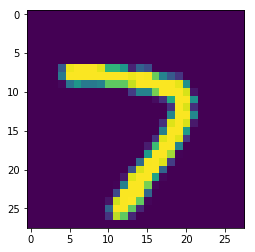

Predicted: 8 Actual: 3


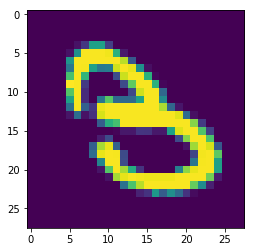

Predicted: 4 Actual: 4


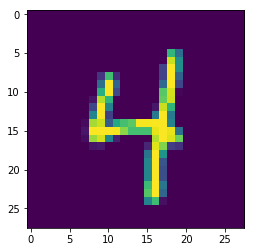

Predicted: 9 Actual: 9


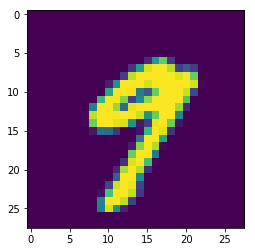

Predicted: 6 Actual: 6


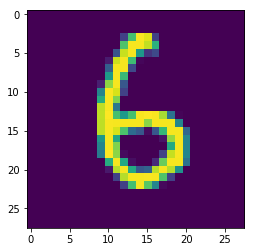

Predicted: 6 Actual: 6


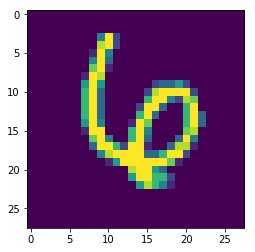

Predicted: 5 Actual: 5


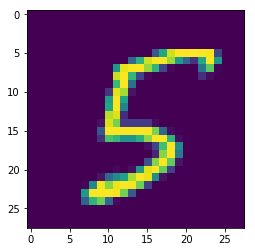

Predicted: 4 Actual: 4


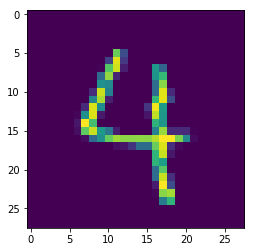

Predicted: 0 Actual: 0


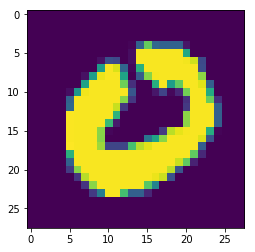

Predicted: 7 Actual: 7


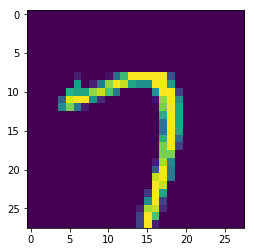

Predicted: 4 Actual: 4


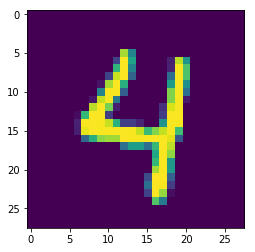

Predicted: 0 Actual: 0


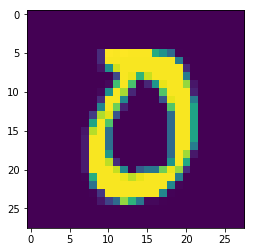

Predicted: 1 Actual: 1


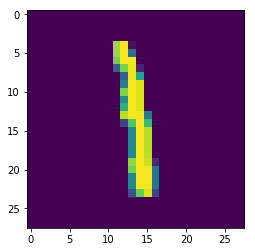

In [12]:
i=0
for p,q,r in zip(predictions,y_test,x_test):
    print(f'Predicted: {np.argmax(p)} Actual: {q}')
    plt.imshow(r)
    plt.show()
    i=i+1
    if i==30:
        break